# Import Library

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data

In [2]:
data=pd.read_csv('data\mass_31012025.csv',comment='#', delim_whitespace=True)
data

,X_Value,Channel4,Channel3,Channel2,Channel1
0,0.000000e+00,-0.0072,-0.0008,-0.0040,0.0020
1,2.000000e-10,-0.0080,-0.0008,-0.0036,0.0020
2,4.000000e-10,-0.0088,-0.0008,-0.0032,0.0020
3,6.000000e-10,-0.0084,-0.0016,-0.0036,0.0020
4,8.000000e-10,-0.0076,-0.0012,-0.0036,0.0020
...,...,...,...,...,...
2540630,2.640247e+05,-0.0076,-0.0012,-0.0052,0.0024
2540631,2.640247e+05,-0.0080,-0.0012,-0.0044,0.0024
2540632,2.640247e+05,-0.0076,-0.0016,-0.0028,0.0040
2540633,2.640247e+05,-0.0080,-0.0012,-0.0028,0.0044


In [3]:
cols = data.columns[1:].tolist()
cols.reverse()
cols= [data.columns[0]] + cols
cols

['X_Value', 'Channel1', 'Channel2', 'Channel3', 'Channel4']

In [4]:
data=data[cols]
data

,X_Value,Channel1,Channel2,Channel3,Channel4
0,0.000000e+00,0.0020,-0.0040,-0.0008,-0.0072
1,2.000000e-10,0.0020,-0.0036,-0.0008,-0.0080
2,4.000000e-10,0.0020,-0.0032,-0.0008,-0.0088
3,6.000000e-10,0.0020,-0.0036,-0.0016,-0.0084
4,8.000000e-10,0.0020,-0.0036,-0.0012,-0.0076
...,...,...,...,...,...
2540630,2.640247e+05,0.0024,-0.0052,-0.0012,-0.0076
2540631,2.640247e+05,0.0024,-0.0044,-0.0012,-0.0080
2540632,2.640247e+05,0.0040,-0.0028,-0.0016,-0.0076
2540633,2.640247e+05,0.0044,-0.0028,-0.0012,-0.0080


# Plot Events

Adding a column for `event_ID` and repeated the `X_Value` of the first event for all events

In [5]:
# Define event size
event_size = 4001

# Ensure the DataFrame can be evenly split
num_events = len(data) // event_size
print(f'Expected number of events: {num_events}')

# Assign an Event_ID column to the DataFrame
data = data.iloc[:num_events * event_size].copy()  # Trim excess rows if any
data.insert(0,'Event_ID', data.index // event_size)


# Replace 'X_Value' for all events with 'times' from event 0
times = data[data['Event_ID'] == 0]['X_Value'].values
data['X_Value'] = np.tile(times, num_events)

#Store each event in the events list
events = []
for event_id in range(num_events):
    event_data = data[data['Event_ID'] == event_id]
    events.append(event_data)
# Optionally, store each event in separate CSV files    
    # event_data.to_csv(f"event_{event_id + 1}.csv", index=False)

# Print confirmation
print(f"Total events extracted: {len(events)}")

data

Expected number of events: 635
Total events extracted: 635


,Event_ID,X_Value,Channel1,Channel2,Channel3,Channel4
0,0,0.000000e+00,0.0020,-0.0040,-0.0008,-0.0072
1,0,2.000000e-10,0.0020,-0.0036,-0.0008,-0.0080
2,0,4.000000e-10,0.0020,-0.0032,-0.0008,-0.0088
3,0,6.000000e-10,0.0020,-0.0036,-0.0016,-0.0084
4,0,8.000000e-10,0.0020,-0.0036,-0.0012,-0.0076
...,...,...,...,...,...,...
2540630,634,7.992000e-07,0.0024,-0.0052,-0.0012,-0.0076
2540631,634,7.994000e-07,0.0024,-0.0044,-0.0012,-0.0080
2540632,634,7.996000e-07,0.0040,-0.0028,-0.0016,-0.0076
2540633,634,7.998000e-07,0.0044,-0.0028,-0.0012,-0.0080


In [6]:
def plot_event(num_event):
    by_event=data.groupby(data.Event_ID)
    event=(by_event.get_group(num_event)).drop(columns=['Event_ID'])
    event.plot(x='X_Value', y=['Channel4','Channel3','Channel2','Channel1'],
           xlim=(4e-7,7e-7), legend='True', #kind='scatter',
           title='Event '+str(num_event))

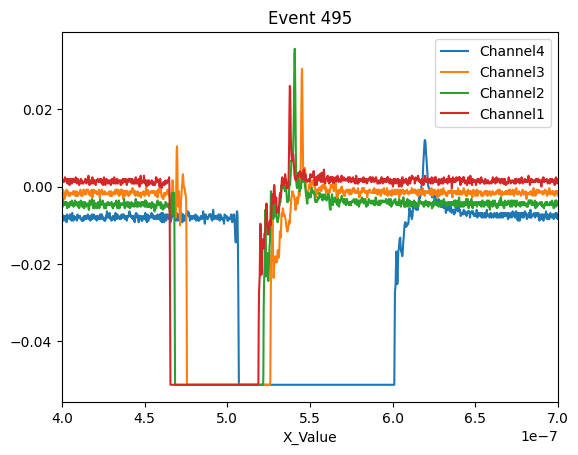

In [7]:
plot_event(495)

In [8]:
data.columns[2:]

Index(['Channel1', 'Channel2', 'Channel3', 'Channel4'], dtype='object')

# Determination of the velocity 

In [63]:
#Experiemntal constant 
D12=64e-2 #m
D23=88e-2 #m
D13= 152e-2 #m
d= 2.85e-2 #m: thickness of lead

#Fundamental constant
c=3e8

In [ ]:
def find_detection_times(data):
    '''less efficient version'''
    nevent = len(data) // event_size
    by_event = data.groupby(data.Event_ID)
    detection_times={}
    for event in range(nevent):
        data_event = by_event.get_group(event) #.drop(columns=['Event_ID'])
        dtimes = {}
        for channel in data_event.columns[1:-1]:
            k=0
            while np.abs(data_event[channel].iloc[k]) < 0.02:
                k+=1
            dtimes[channel] = data_event['X_Value'].iloc[k]
        detection_times[event]=dtimes
        dfres = pd.DataFrame(detection_times).transpose()
    return dfres

alternative version

In [45]:
def compute_detection_times(data, threshold=0.02):
    # Assume the DataFrame has columns: 'Event_ID', channel columns, and 'X_Value' as the last column.
    channels = data.columns[2:]  # Excludes 'Event_ID' and 'X_Value'
    
    # Reshape data to a long format: one row per measurement per channel.
    melted = data.melt(id_vars=['Event_ID', 'X_Value'],
                       value_vars=channels,
                       var_name='channel',
                       value_name='signal')
    
    # Filter rows where the absolute signal exceeds the threshold.
    filtered = melted[np.abs(melted['signal']) > threshold]
    print(filtered)
    
    # For each Event_ID and channel, find the smallest X_Value where the condition is met.
    detection_times = filtered.groupby(['Event_ID','channel'])['X_Value'].min().unstack()
    
 # Reset index so that 'Event_ID' becomes a column instead of the index.
    detection_times = detection_times.reset_index()
    
    # Remove the column index name ('channel') when printing the DataFrame.
    detection_times.columns.name = None

    return detection_times


In [46]:
detection_times = compute_detection_times(data)
detection_times

          Event_ID       X_Value   channel  signal
2334             0  4.668000e-07  Channel1 -0.0400
2335             0  4.670000e-07  Channel1 -0.0512
2336             0  4.672000e-07  Channel1 -0.0512
2337             0  4.674000e-07  Channel1 -0.0512
2338             0  4.676000e-07  Channel1 -0.0512
...            ...           ...       ...     ...
10161548       634  6.018000e-07  Channel4 -0.0292
10161549       634  6.020000e-07  Channel4 -0.0252
10161553       634  6.028000e-07  Channel4 -0.0240
10161554       634  6.030000e-07  Channel4 -0.0248
10161555       634  6.032000e-07  Channel4 -0.0224

[852270 rows x 4 columns]


,Event_ID,Channel1,Channel2,Channel3,Channel4
0,0,4.668000e-07,4.690000e-07,4.722000e-07,5.076000e-07
1,1,4.692000e-07,4.692000e-07,4.734000e-07,5.076000e-07
2,2,4.676000e-07,4.688000e-07,4.738000e-07,5.076000e-07
3,3,4.680000e-07,4.688000e-07,4.732000e-07,5.074000e-07
4,4,4.668000e-07,4.686000e-07,4.736000e-07,5.072000e-07
...,...,...,...,...,...
630,630,4.672000e-07,4.684000e-07,4.706000e-07,5.068000e-07
631,631,4.684000e-07,4.684000e-07,4.740000e-07,5.068000e-07
632,632,4.670000e-07,4.682000e-07,4.718000e-07,5.068000e-07
633,633,4.644000e-07,4.684000e-07,4.728000e-07,5.068000e-07


In [47]:
detection_times['Dt12'] = np.abs(detection_times.Channel1 - detection_times.Channel2)
detection_times['Dt23'] = np.abs(detection_times.Channel3 - detection_times.Channel2)
detection_times['Dt13'] = np.abs(detection_times.Channel1 - detection_times.Channel3)
detection_times

,Event_ID,Channel1,Channel2,Channel3,Channel4,Dt12,Dt23,Dt13
0,0,4.668000e-07,4.690000e-07,4.722000e-07,5.076000e-07,2.200000e-09,3.200000e-09,5.400000e-09
1,1,4.692000e-07,4.692000e-07,4.734000e-07,5.076000e-07,0.000000e+00,4.200000e-09,4.200000e-09
2,2,4.676000e-07,4.688000e-07,4.738000e-07,5.076000e-07,1.200000e-09,5.000000e-09,6.200000e-09
3,3,4.680000e-07,4.688000e-07,4.732000e-07,5.074000e-07,8.000000e-10,4.400000e-09,5.200000e-09
4,4,4.668000e-07,4.686000e-07,4.736000e-07,5.072000e-07,1.800000e-09,5.000000e-09,6.800000e-09
...,...,...,...,...,...,...,...,...
630,630,4.672000e-07,4.684000e-07,4.706000e-07,5.068000e-07,1.200000e-09,2.200000e-09,3.400000e-09
631,631,4.684000e-07,4.684000e-07,4.740000e-07,5.068000e-07,0.000000e+00,5.600000e-09,5.600000e-09
632,632,4.670000e-07,4.682000e-07,4.718000e-07,5.068000e-07,1.200000e-09,3.600000e-09,4.800000e-09
633,633,4.644000e-07,4.684000e-07,4.728000e-07,5.068000e-07,4.000000e-09,4.400000e-09,8.400000e-09


In [54]:
def event_exclusion(detection_times):
    nevent = len(data) // event_size
    mask = (detection_times['Dt12'] != 0) & (detection_times['Dt23'] != 0) & (detection_times['Dt13'] != 0)
    kept_event = detection_times[mask].drop(columns=['Event_ID'])
    ndropped = nevent - np.sum(mask)
    print('Number of dropped event:', ndropped)
    return kept_event.reset_index(names='Event_ID')


In [55]:
kept_detection_times = event_exclusion(detection_times)
kept_detection_times

Number of dropped event: 31


,Event_ID,Channel1,Channel2,Channel3,Channel4,Dt12,Dt23,Dt13
0,0,4.668000e-07,4.690000e-07,4.722000e-07,5.076000e-07,2.200000e-09,3.200000e-09,5.400000e-09
1,2,4.676000e-07,4.688000e-07,4.738000e-07,5.076000e-07,1.200000e-09,5.000000e-09,6.200000e-09
2,3,4.680000e-07,4.688000e-07,4.732000e-07,5.074000e-07,8.000000e-10,4.400000e-09,5.200000e-09
3,4,4.668000e-07,4.686000e-07,4.736000e-07,5.072000e-07,1.800000e-09,5.000000e-09,6.800000e-09
4,5,4.652000e-07,4.688000e-07,4.730000e-07,5.074000e-07,3.600000e-09,4.200000e-09,7.800000e-09
...,...,...,...,...,...,...,...,...
599,629,4.656000e-07,4.682000e-07,4.718000e-07,5.068000e-07,2.600000e-09,3.600000e-09,6.200000e-09
600,630,4.672000e-07,4.684000e-07,4.706000e-07,5.068000e-07,1.200000e-09,2.200000e-09,3.400000e-09
601,632,4.670000e-07,4.682000e-07,4.718000e-07,5.068000e-07,1.200000e-09,3.600000e-09,4.800000e-09
602,633,4.644000e-07,4.684000e-07,4.728000e-07,5.068000e-07,4.000000e-09,4.400000e-09,8.400000e-09


In [59]:
def compute_velocities(Dt):
    velocities = pd.DataFrame(columns=['v12','v23','v13'])
    velocities['v12']= D12/Dt['Dt12']
    velocities['v23']= D23/Dt['Dt23']
    velocities['v13']=D13/Dt['Dt13']
    
    return  velocities
    

In [71]:
velocities=compute_velocities(kept_detection_times)
velocities

,v12,v23,v13
0,2.909091e+08,2.750000e+08,2.814815e+08
1,5.333333e+08,1.760000e+08,2.451613e+08
2,8.000000e+08,2.000000e+08,2.923077e+08
3,3.555556e+08,1.760000e+08,2.235294e+08
4,1.777778e+08,2.095238e+08,1.948718e+08
...,...,...,...
599,2.461538e+08,2.444444e+08,2.451613e+08
600,5.333333e+08,4.000000e+08,4.470588e+08
601,5.333333e+08,2.444444e+08,3.166667e+08
602,1.600000e+08,2.000000e+08,1.809524e+08


In [75]:
mask = velocities/c > 1
print('Number of faster-than-light velocities : \n', np.sum(mask))

Number of faster-than-light velocities : 
 v12    380
v23    258
v13    355
dtype: int64


# Determination of the mass